## **Necessary Imports**

In [8]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style='whitegrid')

## **Mounting Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Initializing data folder**

In [10]:
%cd /content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data/

/content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data


## **Reading csv file**

In [11]:
df = pd.read_csv("preprocessed_dataset.csv")

## **Viewing dataframe**

In [12]:
df.head()

,CustomerID,Revenue_given,Frequency,Recency,Country
0,12346,0.00,2,326,United Kingdom
1,12347,4310.00,182,40,Iceland
2,12348,1797.24,31,76,Finland
3,12349,1757.55,73,19,Italy
4,12350,334.40,17,311,Norway


## **Customers from different countries**

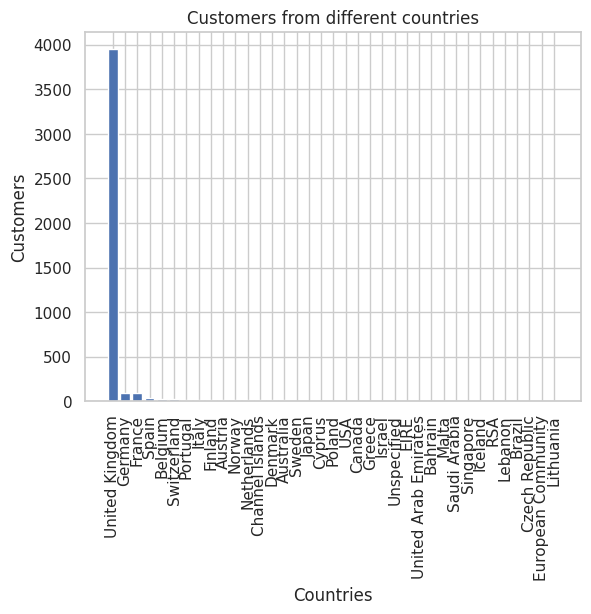

In [13]:
customer_countries = df['Country'].value_counts().to_dict()

x = customer_countries.keys()
y = customer_countries.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Customers')
plt.title('Customers from different countries')
plt.show()

## **Customer features visualization**

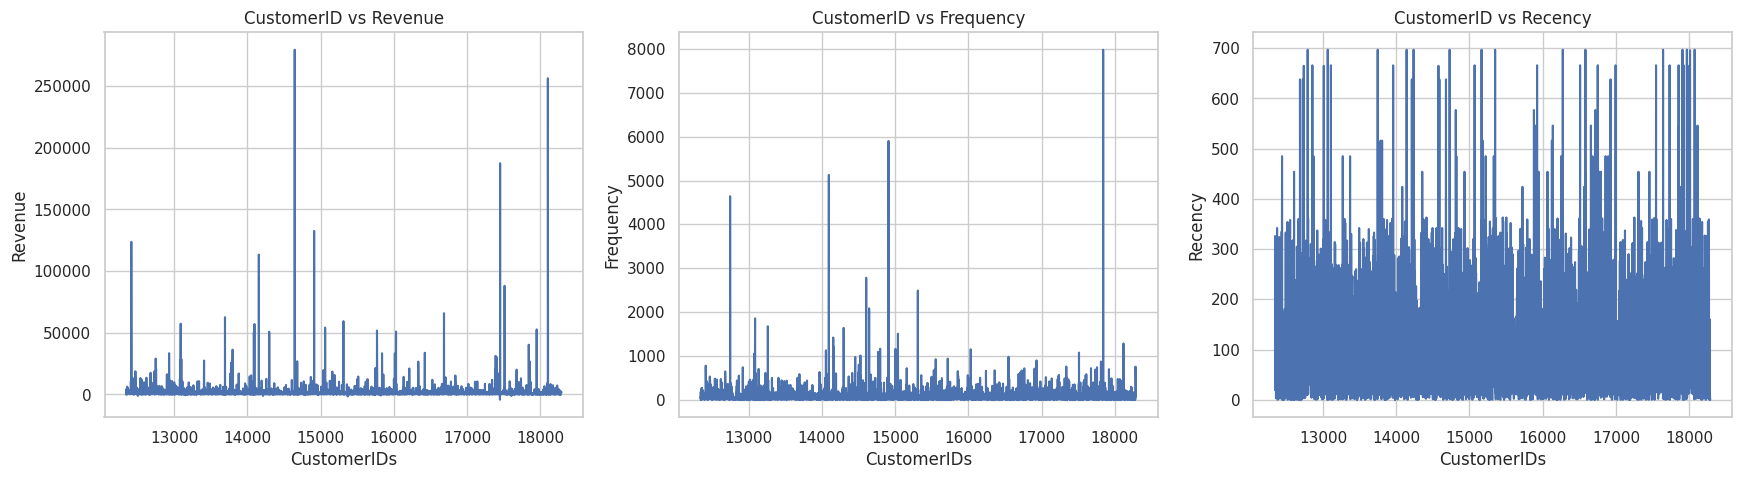

In [42]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
plt.plot("CustomerID", "Revenue_given", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Revenue")
plt.title("CustomerID vs Revenue")

plt.subplot(1,3,2)
plt.plot("CustomerID", "Frequency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Frequency")
plt.title("CustomerID vs Frequency")

plt.subplot(1,3,3)
plt.plot("CustomerID", "Recency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Recency")
plt.title("CustomerID vs Recency")

plt.show()

## **Viewing mean, standard deviation and other values for numeric columns**

In [40]:
df.drop(['CustomerID'], axis=1).describe()

,Revenue_given,Frequency,Recency
count,4380.000000,4380.000000,4380.000000
mean,1900.415017,93.094749,100.877397
std,8212.268604,232.281775,113.867476
min,-4287.630000,1.000000,0.000000
25%,294.247500,17.000000,20.000000
50%,649.955000,42.000000,57.000000
75%,1618.455000,102.000000,152.000000
max,279489.020000,7983.000000,697.000000


## **If any kind of relationship exists between data**

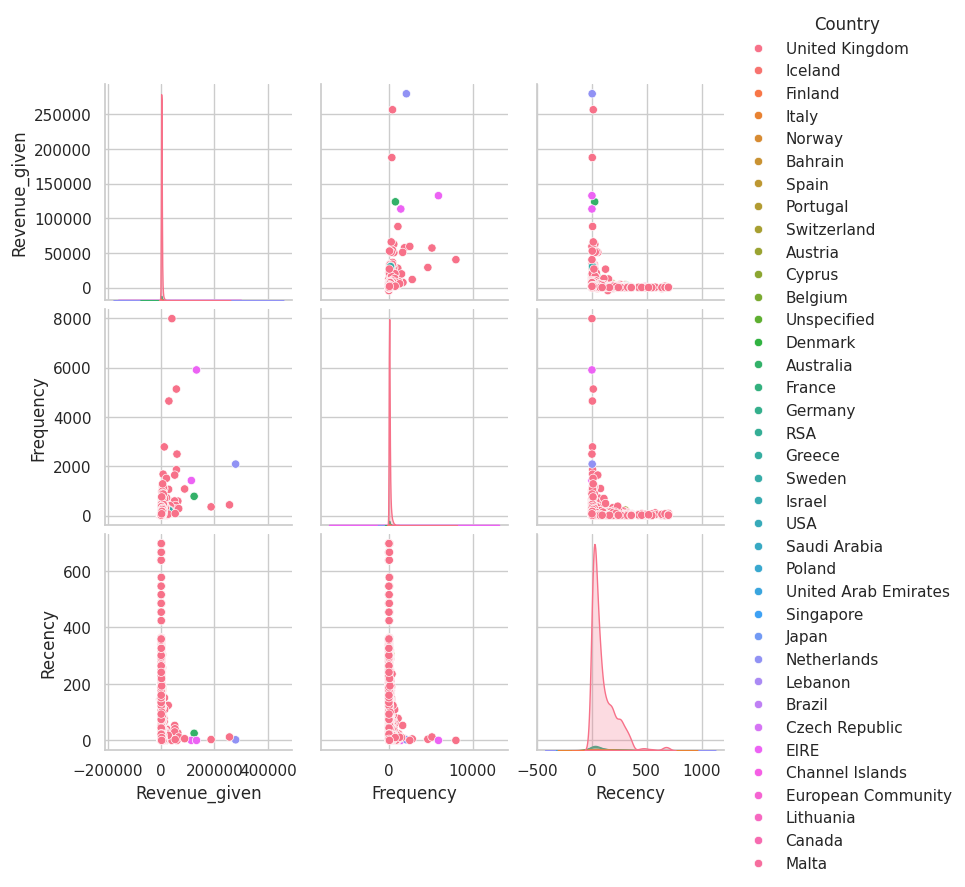

In [48]:
sns.pairplot(df, vars=["Revenue_given", "Frequency", "Recency"], hue="Country")
plt.show()

### **We can't see any kind of noticable relationships in between the data. So, we have to extract features using extraction techniques.**

## **Let's see if outliers exists in the numeric columns**

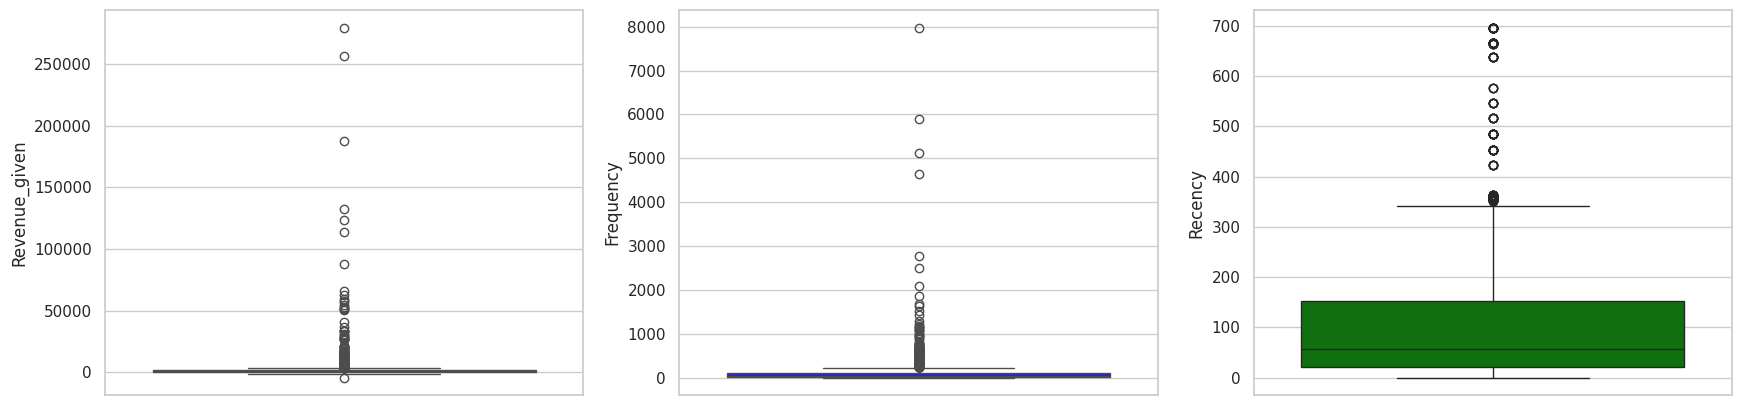

In [46]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.boxplot(df['Revenue_given'], color="red")

plt.subplot(1,3,2)
sns.boxplot(df['Frequency'], color="blue")

plt.subplot(1,3,3)
sns.boxplot(df['Recency'], color="green")

plt.show()

### **We can see that outliers exists in the numeric columns.**